## Dataset Description
This data set contains information about +9000 movies extracted from TMDB.

## Columns Descriptions
1. `Release_Date`: Date when the movie was released.
2. `Title`: Name of the movie.
3. `Overview`: Brief summary of the movie.
4. `Popularity`: It is a very important metric computed by TMDB developers based on the number of views per day, votes per day, number of users marked it as "favorite" and "watchlist" for the data, release date and more other metrics.
5. `Vote_Count`: Total votes received from the viewers.
6. `Vote_Average`: Average rating based on vote count and the number of viewers out of 10.
7. `Original_Language`: Original language of the movies. Dubbed version is not considered to be original language.
8. `Genre`: Categories the movie it can be classified as.
9. `Poster_Url`: Url of the movie poster.

## EDA Questions
- Q1: What is the most frequent `genre` in the dataset?
- Q2: What `genres` has highest `votes`?
- Q3: What movie got the highest `popularity`? what's its `genre`?
- Q4: Which year has the most filmmed movies?
___

## Environment Set-up

In [114]:
# importing lib.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



___
### Public Functions
here, we'd put all of the public functions to be used in this notebook

**For usability and functionality sake, we would categorize columns using a function.**

In [115]:
def catigorize_col (df, col, labels):
    """
    catigorizes a certain column based on its quartiles

    Args:
        (df)     df   - dataframe we are proccesing
        (col)    str  - to be catigorized column's name
        (labels) list - list of labels from min to max

    Returns:
        (df)     df   - dataframe with the categorized col
    """

    # setting the edges to cut the column accordingly
    edges = [df[col].describe()['min'],
             df[col].describe()['25%'],
             df[col].describe()['50%'],
             df[col].describe()['75%'],
             df[col].describe()['max']]

    df[col] = pd.cut(df[col], edges, labels = labels, duplicates='drop')
    return df

___
## Data Wrangling
here, we'd load our data from the CSV file, and check for any required cleaning steps.

In [116]:
# loading data and viewing its first 5 rows
df = pd.read_csv('mymoviedb.csv', lineterminator='\n')
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [117]:
# viewing dataset info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   object 
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 691.1+ KB
None


- `Overview`, `Original_Languege` and `Poster-Url` wouldn't be so useful during analysis
- `Release_Date` column needs to be casted into date time and to extract only the year value

In [118]:
## View NaN values
df.isna().sum()

,0
Release_Date,0
Title,0
Overview,0
Popularity,0
Vote_Count,0
Vote_Average,0
Original_Language,0
Genre,0
Poster_Url,0


- looks like our dataset has no NaNs!


In [119]:
# exploring genres column
df['Genre'].head()

,Genre
0,"Action, Adventure, Science Fiction"
1,"Crime, Mystery, Thriller"
2,Thriller
3,"Animation, Comedy, Family, Fantasy"
4,"Action, Adventure, Thriller, War"


- genres are saperated by commas followed by whitespaces.

In [120]:
# check for duplicated rows
print(df.duplicated().sum())

0


- our dataset has no duplicated rows either.

In [121]:
# exploring summary statistics
df.describe()

,Popularity,Vote_Count,Vote_Average
count,9827.000000,9827.000000,9827.000000
mean,40.326088,1392.805536,6.439534
std,108.873998,2611.206907,1.129759
min,13.354000,0.000000,0.000000
25%,16.128500,146.000000,5.900000
50%,21.199000,444.000000,6.500000
75%,35.191500,1376.000000,7.100000
max,5083.954000,31077.000000,10.000000


### Exploration Summarey
- we have a dataframe consisting of 9827 rows and 9 columns.
- our dataset looks a bit tidy with no NaNs nor duplicated values.
- `Release_Date` column needs to be casted into date time and to extract only the year value.
- `Overview`, `Original_Languege` and `Poster-Url` wouldn't be so useful during analysis, so we'll drop them.
- `Vote_Average` bettter be categorised for proper analysis.
- `Genre` column has comma saperated values and white spaces that needs to be handled and casted into category.
___

## Data Cleaning

**Casting `Release_Date` column and extracing year values**

In [122]:
# casting column a
df['Release_Date'] = pd.to_datetime(df['Release_Date'])

# confirming changes
print(df['Release_Date'].dtypes)

datetime64[ns]


In [123]:
df['Release_Date'] = df['Release_Date'].dt.year
df['Release_Date'].dtypes

dtype('int32')

In [124]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


___
**Dropping `Overview`, `Original_Languege` and `Poster-Url`**

In [125]:
# making list of column to be dropped
cols = ['Overview', 'Original_Language', 'Poster_Url']

# dropping columns and confirming changes
df.drop(cols, axis = 1, inplace = True)
df.columns

Index(['Release_Date', 'Title', 'Popularity', 'Vote_Count', 'Vote_Average',
       'Genre'],
      dtype='object')

___
**categorizing `Vote_Average` column**

We would cut the `Vote_Average` values and make 4 categories: `popular` `average` `below_avg` `not_popular` to describe it more using `catigorize_col()` function provided above.

In [126]:
# define labels for edges
labels = ['not_popular', 'below_avg', 'average', 'popular']

# categorize column based on labels and edges
catigorize_col(df, 'Vote_Average', labels)

# confirming changes
df['Vote_Average'].unique()

['popular', 'below_avg', 'average', 'not_popular', NaN]
Categories (4, object): ['not_popular' < 'below_avg' < 'average' < 'popular']

In [127]:
# exploring column
df['Vote_Average'].value_counts()

,count
Vote_Average,
not_popular,2467
popular,2450
average,2412
below_avg,2398


In [128]:
# dropping NaNs
df.dropna(inplace = True)

# confirming
df.isna().sum()

,0
Release_Date,0
Title,0
Popularity,0
Vote_Count,0
Vote_Average,0
Genre,0


### we'd split genres into a list and then explode our dataframe to have only one genre per row for ezch movie

In [129]:
# split the strings into lists
df['Genre'] = df['Genre'].str.split(', ')

# explode the lists
df = df.explode('Genre').reset_index(drop=True)
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction
3,2022,The Batman,3827.658,1151,popular,Crime
4,2022,The Batman,3827.658,1151,popular,Mystery


In [130]:
# casting column into category
df['Genre'] = df['Genre'].astype('category')

# confirming changes
df['Genre'].dtypes

CategoricalDtype(categories=['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
                  'Documentary', 'Drama', 'Family', 'Fantasy', 'History',
                  'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
                  'TV Movie', 'Thriller', 'War', 'Western'],
, ordered=False, categories_dtype=object)

___

In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25552 entries, 0 to 25551
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Release_Date  25552 non-null  int32   
 1   Title         25552 non-null  object  
 2   Popularity    25552 non-null  float64 
 3   Vote_Count    25552 non-null  int64   
 4   Vote_Average  25552 non-null  category
 5   Genre         25552 non-null  category
dtypes: category(2), float64(1), int32(1), int64(1), object(1)
memory usage: 749.6+ KB


In [132]:
df.nunique()

,0
Release_Date,100
Title,9415
Popularity,8088
Vote_Count,3265
Vote_Average,4
Genre,19


Now that our dataset is clean and tidy, we are left with  a total of 6 columns and 25551 rows to dig into during our analysis

___

## Data Visualization
here, we'd use `Matplotlib` and `seaborn` for making some informative visuals to gain insights abut our data.

In [133]:
# setting up seaborn configurations
sns.set_style('whitegrid')

### Q1: What is the most frequent `genre` in the dataset?


In [134]:
# showing stats. on genre column
df['Genre'].describe()

,Genre
count,25552
unique,19
top,Drama
freq,3715


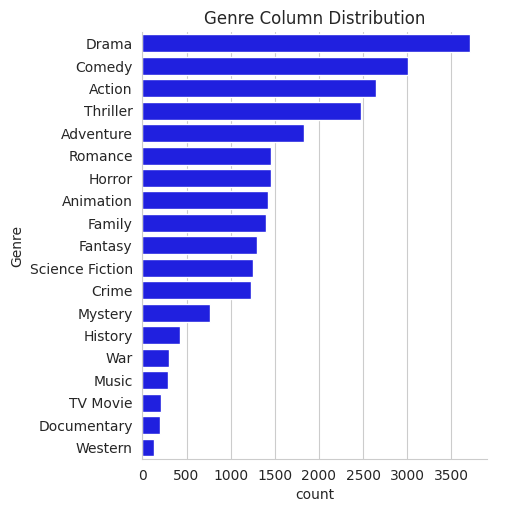

In [135]:
# visualizing genre column
sns.catplot(y = 'Genre', data = df, kind = 'count',
            order = df['Genre'].value_counts().index,
            color = 'b')
plt.title('Genre Column Distribution')
plt.show()

- we can notice from the above visual that `Drama` genre is the most frequent genre in our dataset.

### Q2: What `genres` has highest `votes`?


<ipython-input-136-82db68788f2a>:2: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#fa860c'` for the same effect.

  sns.catplot(y = 'Vote_Average', data = df, hue = 'Vote_Average',kind = 'count',


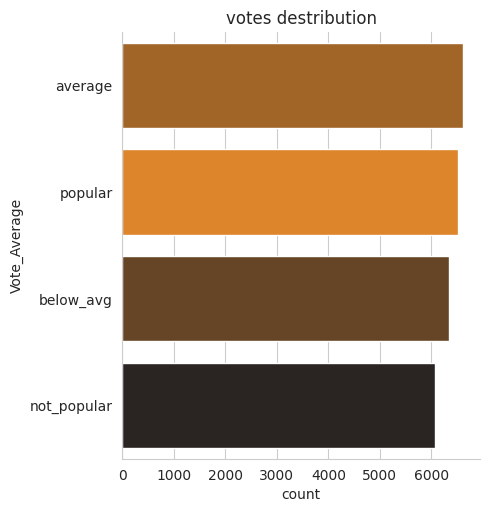

In [136]:
# visualizing vote_average column
sns.catplot(y = 'Vote_Average', data = df, hue = 'Vote_Average',kind = 'count',
            order = df['Vote_Average'].value_counts().index,
            color = '#fa860c')
plt.title('votes destribution')
plt.show()

In [137]:
# saperating popular movies
popular_movies = df[df['Vote_Average'] == 'popular']
print(popular_movies.shape)
popular_movies.head()

(6520, 6)


,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction
3,2022,The Batman,3827.658,1151,popular,Crime
4,2022,The Batman,3827.658,1151,popular,Mystery


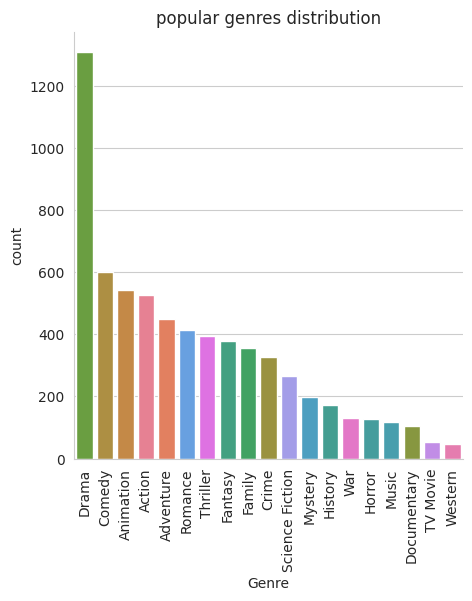

In [138]:
# visualizing genre againest vote_average
sns.catplot(x = 'Genre', data = popular_movies, hue = 'Genre',
            kind = 'count', order = popular_movies['Genre'].value_counts().index)
plt.title('popular genres distribution')
plt.xticks(rotation=90)
plt.show()

- as we can see, `Drama` again gets the highest popularity among fans.

### Q3: What movie got the highest `popularity`? what's its `genre`?


In [139]:
# checking max popularity in dataset
df[df['Popularity'] == df['Popularity'].max()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction


- we can see that `Spider-Man: No Way Home` has the highest popularity rate in our dataset and it has genres of `Action`, `Adventure` and `Science Fiction`.

### Q4: Which year has the most filmmed movies?

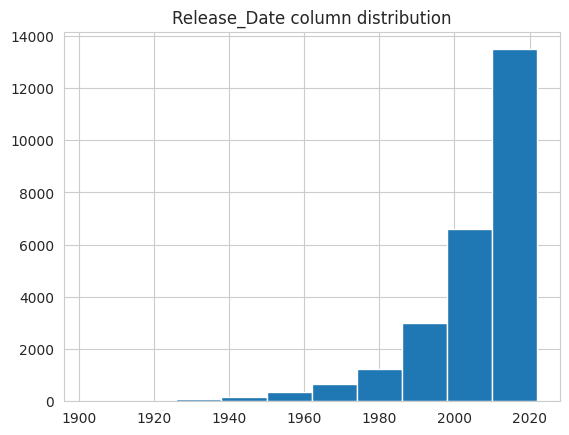

In [140]:
df['Release_Date'].hist()
plt.title('Release_Date column distribution')
plt.show()

- we can see from the above plot that year `2020` has the highest filmming rate in our dataset.

## Correlations

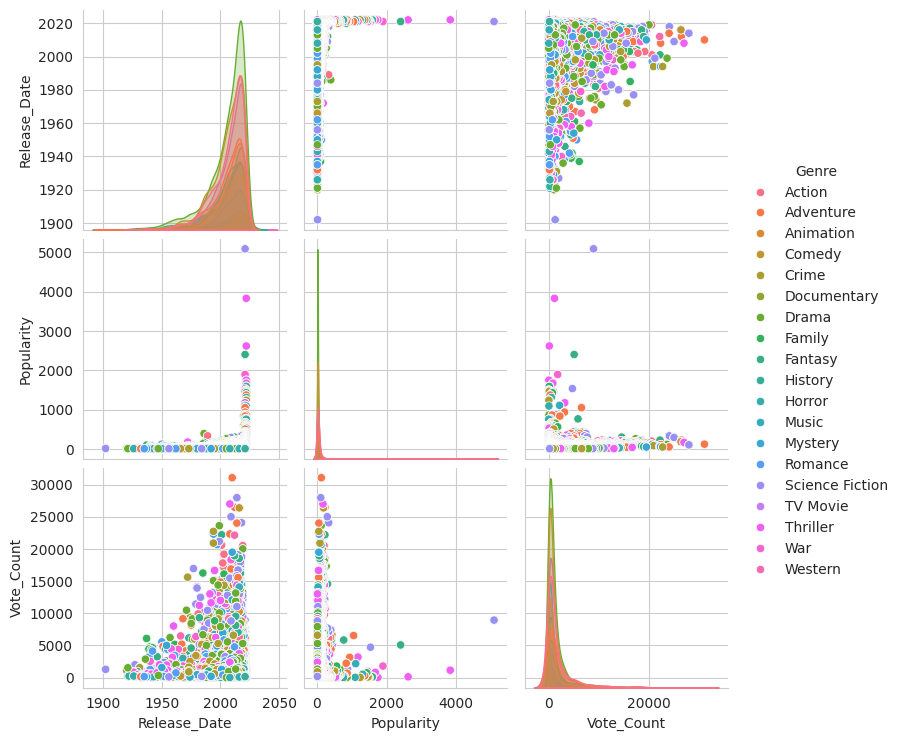

<Figure size 2000x6000 with 0 Axes>

In [141]:
sns.pairplot(df, hue = 'Genre')
plt.figure(figsize=(20,60))
plt.show()

___
## Conclusion
#### Q1: What is the most frequent `genre` in the dataset?
`Drama` genre is the most frequent genre in our dataset.

#### Q2: What `genres` has highest `votes`?
we have 25.5% of our dataset with popular vote (6520 rows).
`Drama` again gets the highest popularity among fans.

#### Q3: What movie got the highest `popularity`? what's its `genre`?
`Spider-Man: No Way Home` has the highest popularity rate in our dataset and it has genres of `Action`, `Adventure` and `Science Fiction`.

#### Q4: Which year has the most filmmed movies?
year `2020` has the highest filmming rate in our dataset.